In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
def isSubsetSum(S, M):
    compare = assign = 0
    n = len(S)
    # The value of subset[i, j] will be
    # true if there is a subset ofzS
    # set[0..j-1] with sum equal to i
    subset = np.array([[True]*(M+1)]*(n+1))
    assign += 2
    # If sum is 0, then answer is true
    for i in range(0, n+1):
        subset[i, 0] = True
        compare += 1
        assign += 1
 
    # If sum is not 0 and set is empty,
    # then answer is false
    for i in range(1, M+1):
        subset[0, i] = False
        compare += 1
        assign += 1
 
    # Fill the subset table in bottom-up manner
    for i in range(1, n+1):
        for j in range(1, M+1):
            if j < S[i-1]:
                subset[i, j] = subset[i-1, j]
            else:
                subset[i, j] = subset[i-1, j] or subset[i-1, j-S[i-1]]
            compare += 2
            assign += 1
        compare += 2
    
    compare += 4

    if subset[n, M]:
        sol = []
        # using backtracing to find the solution
        i = n

        while i >= 0:
            compare += 4
            if (subset[i, M] and not subset[i-1, M]):
                sol.append(S[i-1])
                M -= S[i-1]
                assign += 2
            if M == 0:
                break
            i -= 1
            assign += 1
        if i < 0:
            compare += 1
        assign += 2
        return sol, compare, assign
    else:
        return None, compare, assign

In [3]:
def main():
    # Test
    A = random.sample(range(0, 500), 50)
    S = 200
    print("A = ", np.sort(A))
    print("S = ", S)

    result, _, _ = isSubsetSum(A, S)
    if result is not None:
        print("Found a subset with given sum.")
        print("Solution: ", result)
    else:
        print("No subset with given sum.")

    # Average Time
    N = np.arange(59,1000+1,50)
    random.seed(3)
    AA = np.array([np.random.randint(0, 500, n) for n in N])
    temp = np.array([isSubsetSum(A, S) for A in AA])

    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(N, N*S)
    ax.plot(N, N)
    ax.plot(N, temp[:,1])
    ax.plot(N, temp[:,2])
    ax.set(xlabel="N")
    ax.legend(["N*S", "O(N)", "assign", "compare"])
    plt.savefig("knapsack.jpg")
    plt.show()

A =  [  3   4   7  38  44  45  56  69  78  84  87 107 113 126 128 139 143 168
 179 191 192 247 263 276 280 305 308 311 315 322 341 342 353 368 370 386
 399 403 409 421 433 443 450 451 453 468 469 481 482 497]
S =  200
Found a subset with given sum.
Solution:  [45, 113, 38, 4]


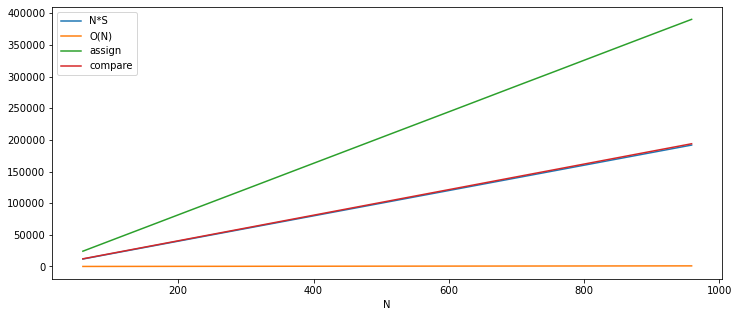

In [4]:
if __name__ == '__main__':
    main()